In [12]:
import numpy as np
import pandas as pd

path="Business_sales_EDA.csv"
zara_df = pd.read_csv(path,sep=";") #se va a separar con ;
zara_df

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain


In [13]:
zara_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [ ]:
zara_df.isnull().sum() #aqui primero mostraba que en description habia 5 valores nulos y en nombre uno

zara_df["description"] = zara_df["description"].fillna("No description") #Llenamos los valores nulos de description con "No description" y los de name con "No name"
zara_df["name"] = zara_df["name"].fillna("No name")

zara_df.isnull().sum() #ahora ya no hay valores nulos

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                0
description         0
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [4]:
zara_df.duplicated().sum()
#no hay duplicados

np.int64(0)

In [5]:
zara_df['price'] = pd.to_numeric(zara_df['price'], errors='coerce') #convierte a numérico, si no puede lo pone como NaN
print(zara_df['price'].dtype)
print('NaN en price:', zara_df['price'].isna().sum())

zara_df['Sales Volume'] = pd.to_numeric(zara_df['Sales Volume'], errors='coerce') #convierte a numérico, si no puede lo pone como NaN
print(zara_df['Sales Volume'].dtype)
print('NaN en Sales Volume:', zara_df['Sales Volume'].isna().sum())



float64
NaN en price: 0
int64
NaN en Sales Volume: 0


In [6]:
zara_df.describe()

#Product ID no puede ser un INT, deberia ser string porque no se hacen operaciones matematicas con el

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


In [7]:
zara_df['Product ID'] = zara_df['Product ID'].astype(str)
zara_df['Product ID'].dtype

dtype('O')

In [8]:
zara_df.describe() 
#ahora si que sale bien porque product id es string

,Sales Volume,price
count,20252.000000,20252.000000
mean,1097.400454,41.949061
std,298.234609,23.380960
min,518.000000,12.000000
25%,849.000000,23.950000
50%,990.000000,35.950000
75%,1364.250000,53.950000
max,1940.000000,134.990000


Aqui se puede ver que el volumen general de prendas vendidas es de 1100. La desviacion estandar esta en 300, signficando que por lo general se venden de 800 a 1400 prendas.

El precio promedio de las prendas es de 41 dolares, con una desviacion estandar de 23 dolares, significando que van por lo generaal de los 20 dolares a los 60 dolares

In [9]:
clothing_filter=zara_df['terms'].value_counts() 
clothing_filter

terms
jackets     11232
sweaters     3257
t-shirts     2646
shoes        2458
jeans         659
Name: count, dtype: int64

In [10]:
seasons_proportion= zara_df['season'].value_counts(normalize=True) * 100 
seasons_proportion=seasons_proportion.round(1) #redondear dos decimales
seasons_proportion
  

season
Autumn    37.8
Winter    25.4
Spring    22.4
Summer    14.3
Name: proportion, dtype: float64

En este dataset, el 38% de los registros son de autumm, osea, lo que mas se vendio fue de la season de otoño

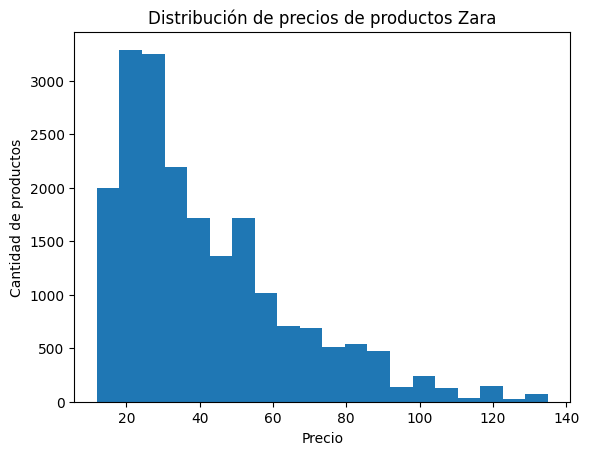

In [11]:
import matplotlib.pyplot as plt

plt.hist(zara_df["price"],bins=20)
plt.xlabel("Precio")
plt.ylabel("Cantidad de productos")
plt.title("Distribución de precios de productos Zara")  
plt.show()  

Zara vende mas sus productos entre 20-40 dolares. Son pocos los articulos que son mas de 80 dolares o mas su precio final